# Efficient Frontier

In [1]:
%load_ext autoreload
%autoreload 2
import stark
industry_returns =  stark.get_ind_returns()

In [2]:
annualized_ind_ret = stark.calculate_annualize_rets(
    industry_returns.loc["1996":"2000"],
    periods_per_year=12
)
cov = industry_returns.loc["1996":"2000"].cov()

In [4]:
cov.style.background_gradient(cmap ="Blues")  

,food,beer,smoke,games,books,hshld,clths,hlth,chems,txtls,cnstr,steel,fabpr,elceq,autos,carry,mines,coal,oil,util,telcm,servs,buseq,paper,trans,whlsl,rtail,meals,fin,other
food,0.002609,0.002379,0.002061,0.000846,0.001035,0.001374,0.001733,0.001230,0.001414,0.001216,0.001487,0.000070,0.000742,0.001313,0.000618,0.001583,0.000909,0.000027,0.001079,0.000943,0.000667,0.000237,-0.000315,0.001429,0.001534,0.000740,0.001363,0.001230,0.002132,0.001057
beer,0.002379,0.005264,0.001359,0.001348,0.000865,0.002804,0.001704,0.001955,0.001460,0.002005,0.002268,0.000213,0.000769,0.001236,0.001520,0.002015,0.000278,0.001728,0.000733,0.000643,0.001146,0.000438,0.000007,0.001710,0.002284,0.000697,0.001690,0.001822,0.002571,0.001383
smoke,0.002061,0.001359,0.008349,0.000379,-0.000128,0.001167,0.000950,0.001038,0.000853,0.000779,0.001446,0.000322,0.000912,0.000006,0.000314,0.001812,0.001588,-0.000733,0.000984,0.001274,0.000062,-0.000218,-0.000120,0.001327,0.000396,0.001707,0.000105,0.000703,0.001312,0.001741
games,0.000846,0.001348,0.000379,0.003773,0.001726,0.001206,0.002189,0.001433,0.001775,0.001422,0.002013,0.003132,0.002848,0.002386,0.002371,0.001874,0.001777,0.001888,0.001119,0.000036,0.001922,0.002848,0.003434,0.001852,0.001578,0.001966,0.001872,0.001561,0.002416,0.002382
books,0.001035,0.000865,-0.000128,0.001726,0.002612,0.001025,0.002361,0.000758,0.001731,0.001459,0.001753,0.001992,0.001947,0.002426,0.001723,0.001422,0.001304,0.002426,0.000988,0.000550,0.001918,0.002367,0.001944,0.001638,0.001776,0.001392,0.002223,0.001189,0.002261,0.001442
hshld,0.001374,0.002804,0.001167,0.001206,0.001025,0.003300,0.001320,0.001473,0.001413,0.001364,0.002080,0.001296,0.001343,0.001675,0.001760,0.001975,0.000687,0.002300,0.000620,0.000373,0.001060,0.001310,0.001102,0.001873,0.001582,0.000683,0.001378,0.001202,0.001912,0.001580
clths,0.001733,0.001704,0.000950,0.002189,0.002361,0.001320,0.005655,0.000834,0.002932,0.002472,0.002937,0.001895,0.002834,0.002593,0.002887,0.003301,0.002685,0.002792,0.001924,0.000800,0.001436,0.001625,0.000834,0.003165,0.002862,0.001934,0.003013,0.002721,0.003210,0.002299
hlth,0.001230,0.001955,0.001038,0.001433,0.000758,0.001473,0.000834,0.002565,0.000474,0.000608,0.001399,0.001019,0.000896,0.001260,0.001019,0.000784,0.001223,0.001902,0.000597,0.000572,0.001204,0.001651,0.001535,0.000650,0.000944,0.001056,0.000869,0.000986,0.001617,0.001258
chems,0.001414,0.001460,0.000853,0.001775,0.001731,0.001413,0.002932,0.000474,0.003276,0.001868,0.002088,0.002588,0.002536,0.001755,0.002034,0.002592,0.002425,0.002213,0.002077,0.000673,0.001004,0.001203,0.001031,0.002920,0.002196,0.001404,0.001808,0.001646,0.002469,0.002059
txtls,0.001216,0.002005,0.000779,0.001422,0.001459,0.001364,0.002472,0.000608,0.001868,0.003117,0.001860,0.001322,0.001691,0.001222,0.001982,0.002035,0.001291,0.000732,0.001274,0.000926,0.000907,0.000666,0.000702,0.002058,0.001929,0.001610,0.001805,0.001250,0.001986,0.001811


In [5]:
def calculate_portfolio_return(weights, returns_data):
    """
    Weights -> Returns
    """
    return weights.T @ returns_data

def calculate_portfolio_vol(weights, cov_mat):
    """
    Weights -> Volatility
    """
    return (weights.T @ cov_mat @ weights) ** 0.5

In [6]:
assets_list = ["food", "beer", "smoke", "coal"]
annualized_ind_ret[assets_list]

food     0.116799
beer     0.141126
smoke    0.107830
coal     0.414689
dtype: float64

In [8]:
cov.loc[assets_list, assets_list]

,food,beer,smoke,coal
food,0.002609,0.002379,0.002061,0.000027
beer,0.002379,0.005264,0.001359,0.001728
smoke,0.002061,0.001359,0.008349,-0.000733
coal,0.000027,0.001728,-0.000733,0.018641


In [14]:
import numpy as np
weights = np.repeat(0.25, 4)
weights

array([0.25, 0.25, 0.25, 0.25])

In [15]:
stark.calculate_portfolio_return(
    weights,
    annualized_ind_ret[assets_list])

0.19511097196038385

In [16]:
stark.calculate_portfolio_vol(
    weights,
    cov.loc[assets_list, assets_list]
)

0.055059195776437045

# 2 Assets Frontier

In [19]:
assets_list = ["games", "fin"]
n_points = 20
weights = [np.array([w, 1 - w]) for w in np.linspace(0, 1, n_points)]
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

<AxesSubplot:xlabel='volatility'>

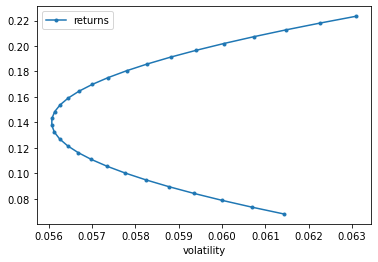

In [25]:
stark.plot_ef2(
    n_points = 30,
    returns_data=annualized_ind_ret[assets_list], 
    cov_matrix=cov.loc[assets_list, assets_list]
)